In this project  we are going to work with COVID19 dataset, published by John Hopkins University, which consist of the data related to cumulative number of confirmed cases, per day, in each Country. Also we have another dataset consist of various life factors, scored by the people living in each country around the globe.The goal of the project is to see any relationship between the spread of the the virus in a country and how happy people are, living in that country by using python data visualization package seaborn.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Reading the Covid19 datasets (.csv file)

In [2]:
covid19_datasets_csv= pd.read_csv('time_series_covid19_confirmed_global.csv')

In [3]:
covid19_datasets_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,172,176,183,186,189,197,212,212,259,267


## Deleting unnecessary columns

In [4]:
covid19_datasets_csv.drop(['Lat','Long'],axis=1, inplace=True)

In [5]:
covid19_datasets_csv.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,27878,28424,28833,29157,29481,29640,30175,30451,30616,30967
1,NaN,Albania,0,0,0,0,0,0,0,0,...,1838,1891,1962,1995,2047,2114,2192,2269,2330,2402
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,11504,11631,11771,11920,12076,12248,12445,12685,12968,13273
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,855
4,NaN,Angola,0,0,0,0,0,0,0,0,...,172,176,183,186,189,197,212,212,259,267


## Applying Aggregation with respect to Country/Region

In [8]:
covid19_dataset_aggregated= covid19_datasets_csv.groupby('Country/Region').sum()

In [90]:
covid19_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,28424,28833,29157,29481,29640,30175,30451,30616,30967,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,1891,1962,1995,2047,2114,2192,2269,2330,2402,82.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,11631,11771,11920,12076,12248,12445,12685,12968,13273,305.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,79.0
Angola,0,0,0,0,0,0,0,0,0,0,...,176,183,186,189,197,212,212,259,267,47.0


## Visualizing data of confirmed cases till 28th of June, 2020

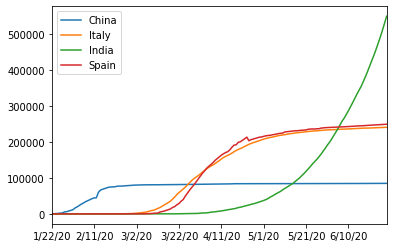

In [19]:
covid19_dataset_aggregated.loc['China'].plot()
covid19_dataset_aggregated.loc['Italy'].plot()
covid19_dataset_aggregated.loc['India'].plot()
covid19_dataset_aggregated.loc['Spain'].plot()
plt.legend()

## Visualizing data for first 3 days at the beginning

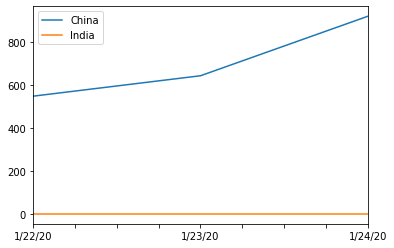

In [25]:
covid19_dataset_aggregated.loc['China'][:3].plot()
covid19_dataset_aggregated.loc['India'][:3].plot()
plt.legend()

## Calculating first derivative of the curve to find out the new confirmed cases for respective countries

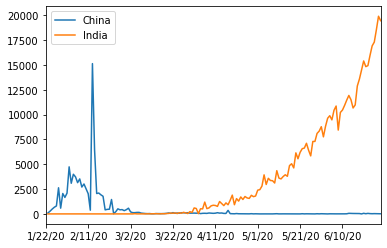

In [28]:
covid19_dataset_aggregated.loc['China'].diff().plot()
covid19_dataset_aggregated.loc['India'].diff().plot()
plt.legend()

In [32]:
# Maximum infection rate for one day in China and India

print('Maximum infection rate for one day in China:',covid19_dataset_aggregated.loc['China'].diff().max(),'\n')
print('Maximum infection rate for one day in India:',covid19_dataset_aggregated.loc['India'].diff().max())

Maximum infection rate for one day in China: 15136.0 

Maximum infection rate for one day in India: 19906.0


## Calculating maximum infection rate for one day for each country and add it in a new column

In [36]:
max_infection_rate=[]
for col in list(covid19_dataset_aggregated.index):
    max_infection_rate.append(covid19_dataset_aggregated.loc[col].diff().max())
covid19_dataset_aggregated['max_infection_rate']= max_infection_rate
covid19_dataset_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,28424,28833,29157,29481,29640,30175,30451,30616,30967,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,1891,1962,1995,2047,2114,2192,2269,2330,2402,82.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,11631,11771,11920,12076,12248,12445,12685,12968,13273,305.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,855,855,855,855,855,855,855,855,855,79.0
Angola,0,0,0,0,0,0,0,0,0,0,...,176,183,186,189,197,212,212,259,267,47.0


In [38]:
covid19_data= pd.DataFrame(covid19_dataset_aggregated['max_infection_rate'])
covid19_data.head()

,max_infection_rate
Country/Region,
Afghanistan,915.0
Albania,82.0
Algeria,305.0
Andorra,79.0
Angola,47.0


In [40]:
covid19_data.shape

(188, 1)

## Reading worldwide happiness report dataset(.csv file)

In [41]:
happiness_report_csv= pd.read_csv('worldwide_happiness_report.csv')

In [42]:
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [43]:
happiness_report_csv.shape

(156, 9)

## Deleting unnecessary columns

In [45]:
happiness_report_csv.drop(['Overall rank','Score','Generosity','Perceptions of corruption'],axis=1,inplace=True)

In [46]:
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [47]:
happiness_report_csv.set_index('Country or region',inplace=True)

In [48]:
happiness_report_csv.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [49]:
happiness_report_csv.shape

(156, 4)

## Performing inner join between Covid19 datasets and happiness report datasets

In [51]:
data= covid19_data.join(happiness_report_csv,how='inner')

In [52]:
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,915.0,0.350,0.517,0.361,0.000
Albania,82.0,0.947,0.848,0.874,0.383
Algeria,305.0,1.002,1.160,0.785,0.086
Argentina,2886.0,1.092,1.432,0.881,0.471
Armenia,771.0,0.850,1.055,0.815,0.283


In [53]:
data.shape

(144, 5)

## Generating correlation matrix

In [54]:
data.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.161558,0.124027,0.164591,0.047868
GDP per capita,0.161558,1.000000,0.757521,0.859431,0.394799
Social support,0.124027,0.757521,1.000000,0.751632,0.456317
Healthy life expectancy,0.164591,0.859431,0.751632,1.000000,0.423146
Freedom to make life choices,0.047868,0.394799,0.456317,0.423146,1.000000


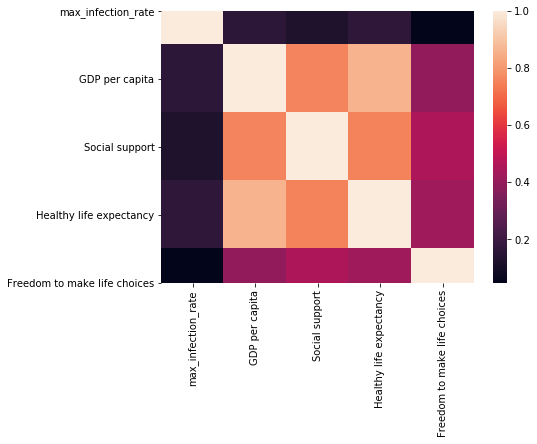

In [68]:
plt.figure(figsize=(7,5))
sns.heatmap(data.corr())

## Data Visualization

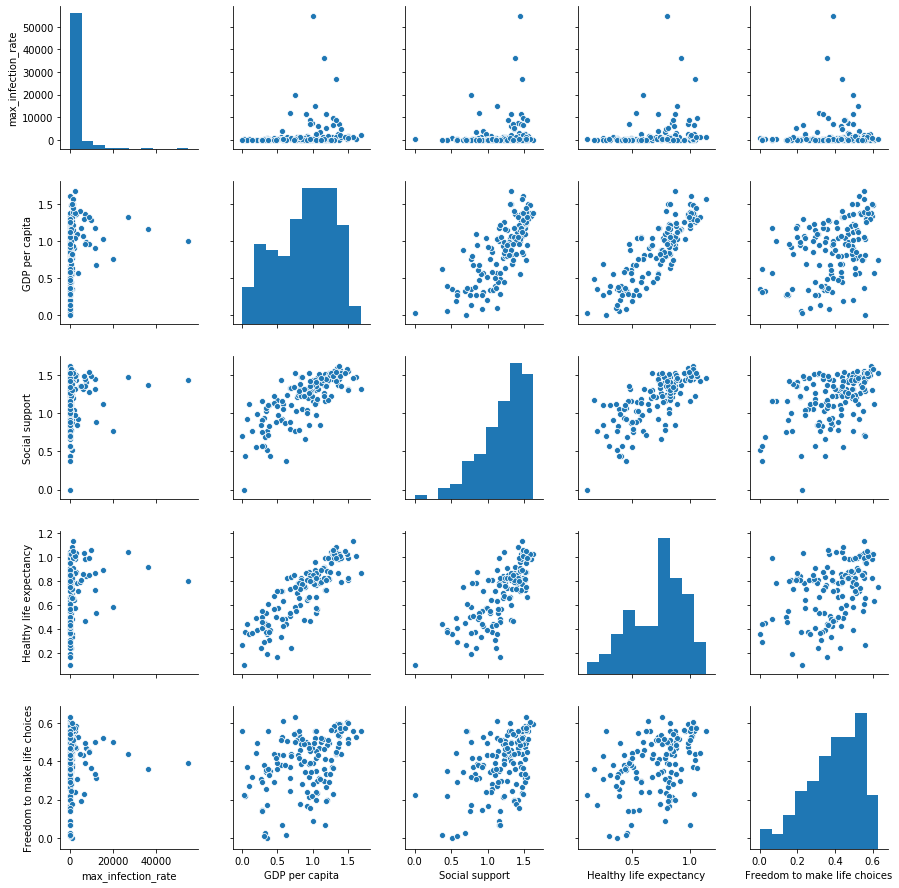

In [101]:

sns.pairplot(data)

## Plotting GDP vs maximum Infection rate

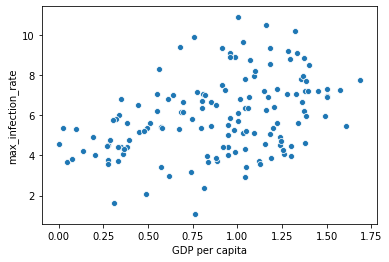

In [80]:
x=data["GDP per capita"]
y=data["max_infection_rate"]
sns.scatterplot(x,np.log(y))

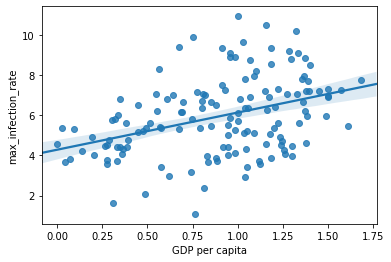

In [81]:
sns.regplot(x,np.log(y))

## Plotting Social support vs maximum Infection rate

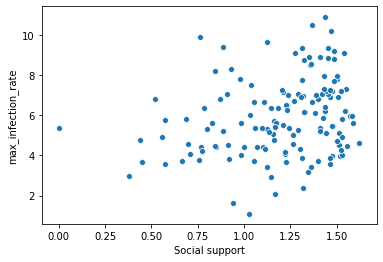

In [82]:
x=data['Social support']
y=data['max_infection_rate']
sns.scatterplot(x,np.log(y))

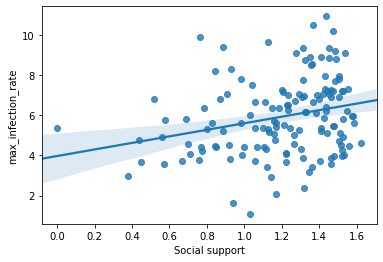

In [83]:
sns.regplot(x,np.log(y))

## Plotting Healthy life expectancy vs maximum Infection rate

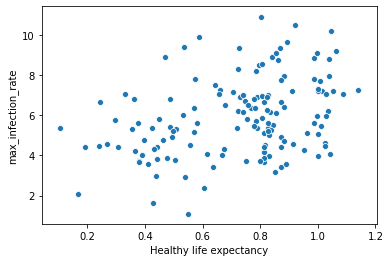

In [84]:
x=data['Healthy life expectancy']
y=data['max_infection_rate']
sns.scatterplot(x,np.log(y))

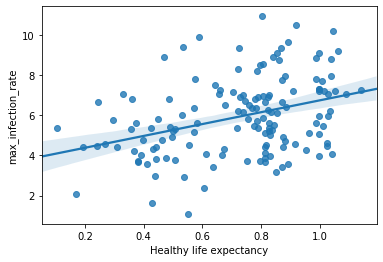

In [85]:
sns.regplot(x,np.log(y))

## Plotting Freedom to make life choices vs maximum Infection rate

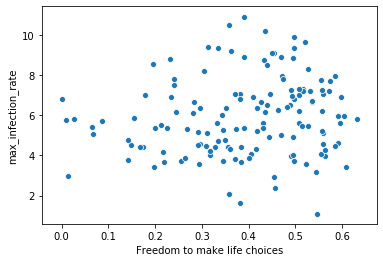

In [87]:
x=data['Freedom to make life choices']
y=data['max_infection_rate']
sns.scatterplot(x,np.log(y))

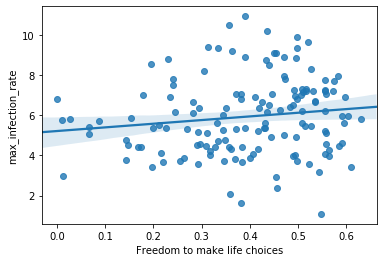

In [88]:
sns.regplot(x,np.log(y))